In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import itertools as it
from scipy.special import ndtr 
from scipy.stats import rv_continuous
from scipy.stats import norm
from tf_keras_vis.saliency import Saliency
from tqdm import tqdm

2023-06-24 17:26:26.429294: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-24 17:26:26.728585: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-24 17:26:26.728611: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-06-24 17:26:26.763562: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-06-24 17:26:27.551658: W tensorflow/stream_executor/platform/de

In [38]:

ens_path = '../../trained/final_allt/'
#opening data
name = 'venus_noise'
data_path = '../../training/training_data/final/final'

In [9]:
model = tf.keras.models.load_model(f'{ens_path}time1000.0.2', compile=False)

2023-06-24 17:30:14.182761: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-06-24 17:30:14.183039: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-06-24 17:30:14.183057: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pop-os): /proc/driver/nvidia/version does not exist
2023-06-24 17:30:14.183507: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [23]:
model.layers

In [13]:
w1 = model.layers[1].weights

In [15]:
import matplotlib.pyplot as plt

In [19]:
w1[0].shape

TensorShape([3, 3, 1, 16])

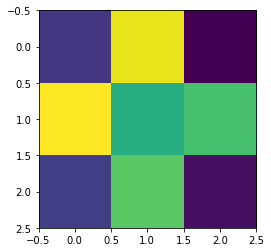

In [29]:
plt.imshow(w1[0][:,:,:,6])

In [40]:
times=[500,1000,1500]
data = {}
for t in times:
    data[f'time{t}'] = np.load(f'{data_path}{t}/data.npy', allow_pickle=True).item()

In [246]:
from tensorflow.keras.models import Model
activation_model = Model(inputs=model.inputs, outputs=model.layers[3].output)

In [247]:
data1500 = data['time1500']['inp_train2']

In [248]:
model.layers

In [235]:
ex = data1500[134]

In [236]:
ex = (ex-ex.mean())/ex.std()

In [237]:
!mkdir featuremaps

mkdir: cannot create directory ‘featuremaps’: File exists


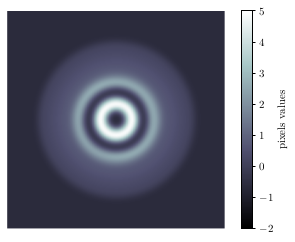

In [244]:
import matplotlib
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'font.size':11,
    'text.usetex': True,
    'pgf.rcfonts': False,
})
plt.imshow(ex, cmap='bone', vmin=-2, vmax=5)
plt.colorbar(label='pixels values')
#plt.title('Input image', size='15')
plt.gca().axis('off')
#plt.gcf().set_size_inches(4,4)
plt.savefig('featuremaps/inp.pdf', bbox_inches='tight')

/tmp/ipykernel_16046/312091745.py:8: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


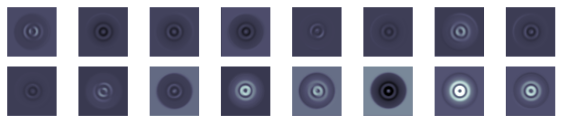

In [253]:
activation = activation_model(ex.reshape(1,128,128))

plt.figure(figsize=(10,2))
for i in range(16):
    plt.subplot(2,8,i+1)
    plt.imshow(activation[0,:,:,i], cmap='bone', vmin=-2, vmax=5)
    plt.gca().axis('off')
plt.show()
#plt.gcf().suptitle('Features maps after conv1', size=14)
plt.savefig('featuremaps/fm1.pdf', bbox_inches='tight')

In [254]:
from tensorflow.keras.models import Model
activation_model = Model(inputs=model.inputs, outputs=model.layers[6].output)

/tmp/ipykernel_16046/3392155367.py:8: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


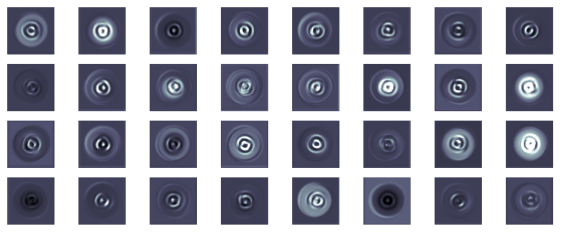

In [255]:
activation = activation_model(ex.reshape(1,128,128))

plt.figure(figsize=(10,4))
for i in range(32):
    plt.subplot(4,8,i+1)
    plt.imshow(activation[0,:,:,i], cmap='bone', vmin=-2, vmax=5)
    plt.gca().axis('off')
plt.show()
#plt.gcf().suptitle('After conv2', size=14)
plt.savefig('featuremaps/fm2.pdf', bbox_inches='tight')

In [257]:
from tensorflow.keras.models import Model
activation_model = Model(inputs=model.inputs, outputs=model.layers[10].output)

/tmp/ipykernel_16046/2776640473.py:8: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


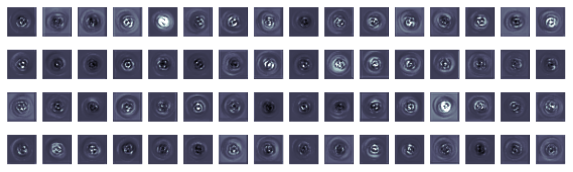

In [258]:
activation = activation_model(ex.reshape(1,128,128))

plt.figure(figsize=(10,3))
for i in range(64):
    plt.subplot(4,16,i+1)
    plt.imshow(activation[0,:,:,i], cmap='bone', vmin=-2, vmax=5)
    plt.gca().axis('off')
plt.show()
#plt.gcf().suptitle('After conv3', size=14)
plt.savefig('featuremaps/fm3.pdf', bbox_inches='tight')